In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/kaggle/input/car-prices-poland/Car_Prices_Poland_Kaggle.csv')
df.head()

,Unnamed: 0,mark,model,generation_name,year,mileage,vol_engine,fuel,city,province,price
0,0,opel,combo,gen-d-2011,2015,139568,1248,Diesel,Janki,Mazowieckie,35900
1,1,opel,combo,gen-d-2011,2018,31991,1499,Diesel,Katowice,Śląskie,78501
2,2,opel,combo,gen-d-2011,2015,278437,1598,Diesel,Brzeg,Opolskie,27000
3,3,opel,combo,gen-d-2011,2016,47600,1248,Diesel,Korfantów,Opolskie,30800
4,4,opel,combo,gen-d-2011,2014,103000,1400,CNG,Tarnowskie Góry,Śląskie,35900


In [3]:
# 1. Dealing with Missing Values
df.isnull().sum()  # Check the number of missing values 

Unnamed: 0             0
mark                   0
model                  0
generation_name    30085
year                   0
mileage                0
vol_engine             0
fuel                   0
city                   0
province               0
price                  0
dtype: int64

In [4]:
# 2. Figuring out why the data is missing
#Because all car dont require has generation_name

In [5]:
# 3. Eliminating extra variables
df = df.drop(['generation_name'], axis=1)

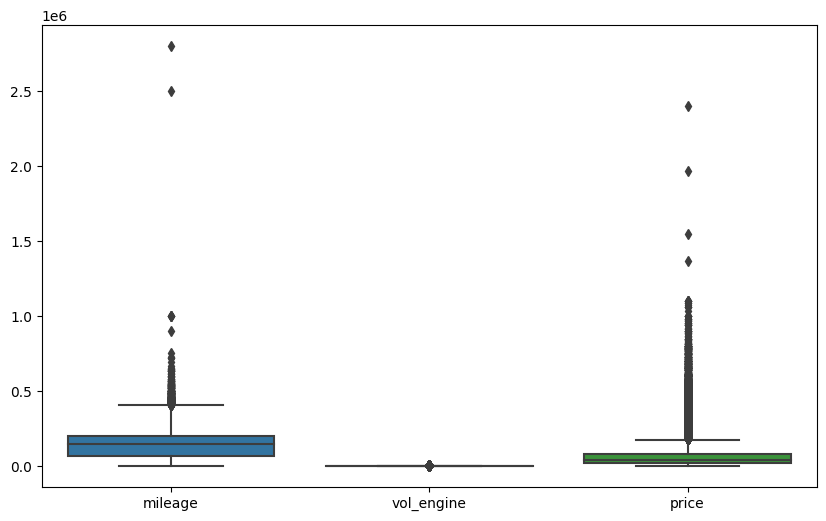

In [6]:
#4. Detecting and removing outliers using box plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['mileage', 'vol_engine', 'price']])
plt.show()

In [7]:
# Remove outliers using z-score
from scipy import stats
df = df[(np.abs(stats.zscore(df[['mileage', 'vol_engine', 'price']])) < 3).all(axis=1)]